### 

### Importando bibliotecas

In [192]:
#!pip install selenium

In [193]:
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC


### Configurando selenium

In [194]:
service = Service()
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(service=service, options=options)
driver.maximize_window()

### Configurando rolagem da pagina para carregamento dos elementos lazy

In [ ]:
url = 'https://steamdb.info/sales/'
driver.get(url)

last_height = driver.execute_script("return document.body.scrollHeight")

for i in range(5):
    driver.execute_script(f"window.scrollTo(0, document.body.scrollHeight * {i * 0.25});")
    time.sleep(2)  # Aguarda um tempo para o conteúdo carregar

driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
time.sleep(2)

new_height = driver.execute_script("return document.body.scrollHeight")
print(f"Altura final da página: {new_height}")


Altura final da página: 5390


### Configurando extracao de elementos

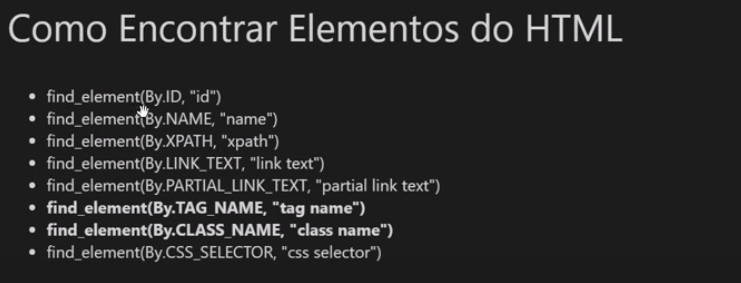

In [196]:
elements_titles = driver.find_elements(By.CLASS_NAME, 'b')
elements2_valuers = driver.find_elements(By.CLASS_NAME, 'dt-type-numeric')
elements3_dates = driver.find_elements(By.CLASS_NAME, 'timeago')

### Formatacao de dados extraidos

In [197]:
dates = [date.text for date in elements3_dates]

In [198]:
print(dates)

['in 6 days', '19 hours ago', 'in 6 days', '19 hours ago', 'in 6 days', '19 hours ago', 'in 3 days', '4 days ago', 'in 6 days', '19 hours ago', 'in 7 days', '7 days ago', 'in 5 hours', '14 days ago', 'in 5 hours', '14 days ago', 'in 11 days', '3 days ago', 'in 5 hours', '14 days ago', 'in 10 days', '4 days ago', 'in 11 days', '3 days ago', 'in 5 hours', '14 days ago', 'in 5 hours', '14 days ago', 'in 4 days', '3 days ago', 'in 5 hours', '14 days ago', 'in 3 days', '2 days ago', 'in 4 days', '3 days ago', 'in 11 days', '3 days ago', '', '', 'in 11 days', '3 days ago', 'in 4 days', '10 days ago', 'in 4 days', '10 days ago', 'in 2 days', '12 days ago', 'in 11 days', '3 days ago', 'in 4 hours', '14 days ago', 'in 8 days', '6 days ago', 'in 10 days', '4 days ago', 'in 2 days', '12 days ago', 'in 2 days', '12 days ago', 'in 4 hours', '7 days ago', 'in 3 days', '4 days ago', 'in 11 days', '3 days ago', 'in 11 days', '3 days ago', 'in 11 days', '3 days ago', 'in 3 days', '4 days ago', 'in 11 d

In [199]:
ends = dates[0::2]
started = dates[1::2]

In [200]:
Numeric = [element.text for element in elements2_valuers]

In [201]:
print(Numeric)

['', '%', 'Price', 'Rating', 'Release', 'Ends', 'Started', '', '-35%', 'R$ 129,99', '79.52%', 'May 2023', 'in 6 days', '19 hours ago', '', '-50%', 'R$ 50,99', '70.47%', 'Dec 2021', 'in 6 days', '19 hours ago', '', '-50%', 'R$ 74,50', '62.52%', 'Apr 2024', 'in 6 days', '19 hours ago', '', '-20%', 'R$ 159,99', '95.98%', 'Aug 2023', 'in 3 days', '4 days ago', '', '-25%', 'R$ 29,99', '93.96%', 'Apr 2024', 'in 6 days', '19 hours ago', '', '-42%', 'R$ 51,61', '92.45%', 'Jan 2024', 'in 7 days', '7 days ago', '', '-30%', 'R$ 83,99', '92.12%', 'Sep 2022', 'in 5 hours', '14 days ago', '', '-25%', 'R$ 89,99', '91.53%', 'Mar 2023', 'in 5 hours', '14 days ago', '', '-75%', 'R$ 23,49', '90.77%', 'Jul 2020', 'in 11 days', '3 days ago', '', '-35%', 'R$ 105,30', '89.30%', 'Jul 2023', 'in 5 hours', '14 days ago', '', '-30%', 'R$ 51,79', '88.89%', 'Jul 2024', 'in 10 days', '4 days ago', '', '-60%', 'R$ 55,99', '88.73%', 'Sep 2023', 'in 11 days', '3 days ago', '', '-60%', 'R$ 64,80', '88.16%', 'Apr 2021',

In [202]:
months = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
disc_e_rating = []
price = []
release = []

for numero in Numeric:
    if '%' in numero:
        disc_e_rating.append(numero)
    elif 'R$' in numero:
        price.append(numero)
    elif any(month in numero for month in months):
        release.append(numero)

In [203]:
print(disc_e_rating)

['%', '-35%', '79.52%', '-50%', '70.47%', '-50%', '62.52%', '-20%', '95.98%', '-25%', '93.96%', '-42%', '92.45%', '-30%', '92.12%', '-25%', '91.53%', '-75%', '90.77%', '-35%', '89.30%', '-30%', '88.89%', '-60%', '88.73%', '-60%', '88.16%', '-75%', '87.75%', '-80%', '87.17%', '-20%', '87.17%', '-20%', '86.78%', '-93%', '85.74%', '-70%', '84.01%', '-85%', '81.94%', '-65%', '80.51%', '-50%', '96.30%', '-50%', '94.06%', '-62%', '93.75%', '-35%', '93.67%', '-60%', '93.53%', '-26%', '92.84%', '-30%', '92.65%', '-66%', '92.63%', '-33%', '92.22%', '-10%', '91.80%', '-35%', '91.79%', '-50%', '91.47%', '-70%', '91.09%', '-60%', '91.09%', '-75%', '90.85%', '-50%', '90.84%', '-50%', '90.83%', '-50%', '90.73%', '-66%', '90.54%', '-60%', '90.43%', '-50%', '90.41%', '-35%', '90.24%', '-40%', '90.12%', '-50%', '89.70%', '-25%', '89.70%', '-70%', '89.62%', '-40%', '89.60%', '-15%', '89.58%', '-75%', '89.52%', '-40%', '89.48%', '-50%', '89.38%', '-50%', '89.38%', '-50%', '89.31%', '-60%', '89.04%', '-70

In [204]:
discount = disc_e_rating[1::2]
rating = disc_e_rating[2::2]

In [205]:
Appslist = [element.text for element in elements_titles]

In [206]:
print(Appslist)

['Age of Wonders 4', 'ICARUS', 'Age of Water', "Baldur's Gate 3", "Minishoot' Adventures", 'UNDERDOGS', 'The Legend of Heroes: Trails from Zero', 'The Legend of Heroes: Trails to Azure', 'STORY OF SEASONS: Friends of Mineral Town', 'The Legend of Heroes: Trails into Reverie', 'Anger Foot', 'Rune Factory 3 Special', 'The Legend of Heroes: Trails of Cold Steel IV', 'The Legend of Heroes: Trails of Cold Steel III', 'Syberia: The World Before', 'The Legend of Heroes: Trails through Daybreak', 'Age of Mythology: Retold', 'Garfield Kart - Furious Racing', 'Rune Factory 4 Special', 'BUTCHER', 'STORY OF SEASONS: Pioneers of Olive Town', 'Resident Evil 4', 'Ghost Trick: Phantom Detective', 'Car Mechanic Simulator 2021', 'The Legend of Heroes: Trails in the Sky SC', 'Beacon Pines', 'Insomnia: Theater in the Head', 'Little Kitty, Big City', 'Maitetsu:Pure Station', 'Mortal Sin', 'Homicipher', "Teenage Mutant Ninja Turtles: Shredder's Revenge", 'The Legend of Heroes: Trails of Cold Steel', 'SENRAN

In [207]:
print(len(price))
print(len(release))
print(len(discount))
print(len(rating))
print(len(ends))
print(len(started))
print(len(Appslist))

100
100
100
100
100
100
100


In [208]:
steam_df_bronze = pd.DataFrame({
    'Nome': Appslist,
    'Desconto': discount,
    'Valor': price,
    'Avaliacao': rating,
    'Lancamento': release,
    'FimPromocao': ends,
    'InicioPromocao': started,
})

In [209]:
steam_df_bronze

,Nome,Desconto,Valor,Avaliacao,Lancamento,FimPromocao,InicioPromocao
0,Age of Wonders 4,-35%,"R$ 129,99",79.52%,May 2023,in 6 days,19 hours ago
1,ICARUS,-50%,"R$ 50,99",70.47%,Dec 2021,in 6 days,19 hours ago
2,Age of Water,-50%,"R$ 74,50",62.52%,Apr 2024,in 6 days,19 hours ago
3,Baldur's Gate 3,-20%,"R$ 159,99",95.98%,Aug 2023,in 3 days,4 days ago
4,Minishoot' Adventures,-25%,"R$ 29,99",93.96%,Apr 2024,in 6 days,19 hours ago
...,...,...,...,...,...,...,...
95,Cyberpunk 2077,-50%,"R$ 99,95",82.48%,Dec 2020,in 2 days,10 days ago
96,Thymesia,-60%,"R$ 29,96",82.22%,Aug 2022,in 3 days,11 days ago
97,Six Days in Fallujah,-25%,"R$ 80,99",82.17%,Jun 2023,in 10 days,20 hours ago
98,Into The Flames,-70%,"R$ 11,39",81.41%,Jan 2023,in 2 days,12 days ago


In [210]:
steam_df_bronze.to_excel("steam_bronze_formated.xlsx", index=False)